In [9]:
# EDA_ReBoot_Stress.ipynb - An√°lisis exploratorio del dataset ReBoot Student Stress Factors

# Librer√≠as principales
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Configuraci√≥n visual
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Cargar datos
df = pd.read_csv("../data/ReBoot_Student_Stress_Factors.csv")
print("‚úÖ Dataset cargado correctamente.")


‚úÖ Dataset cargado correctamente.


In [10]:
import statsmodels.api as sm

# Selecci√≥n de variables predictoras y target
X = df[["anxiety_level", "self_esteem", "depression", "sleep_quality", "bullying", "social_support"]]
y = df["stress_level"]

# A√±adir constante
X = sm.add_constant(X)

# Ajustar modelo
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           stress_level   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     543.3
Date:                Thu, 24 Apr 2025   Prob (F-statistic):          9.88e-324
Time:                        11:56:19   Log-Likelihood:                -584.24
No. Observations:                1100   AIC:                             1182.
Df Residuals:                    1093   BIC:                             1218.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.0587      0.094     11.

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        76
           1       0.90      0.88      0.89        73
           2       0.85      0.87      0.86        71

    accuracy                           0.89       220
   macro avg       0.89      0.89      0.89       220
weighted avg       0.89      0.89      0.89       220



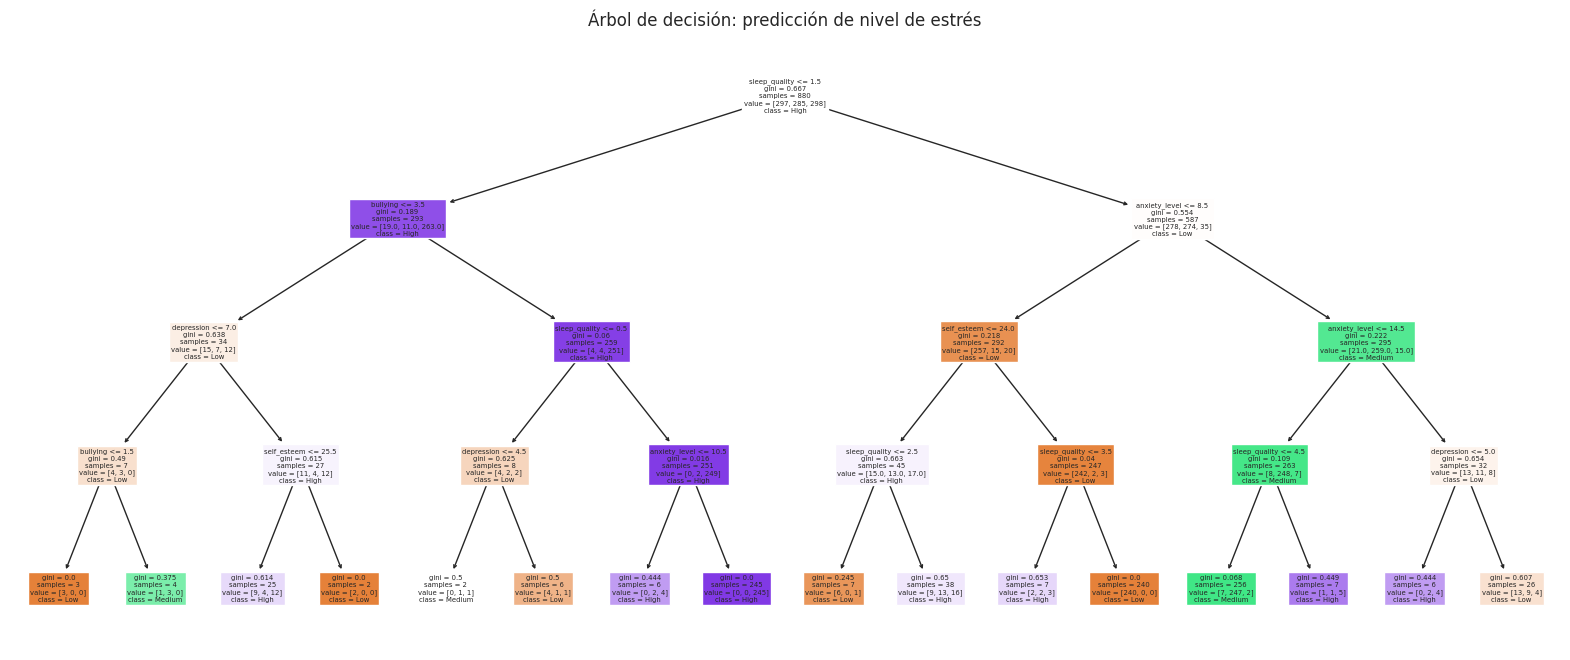

In [11]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Variables predictoras y target
features = ["anxiety_level", "self_esteem", "depression", "sleep_quality", "bullying"]
X = df[features]
y = df["stress_level"]

# Divisi√≥n de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

# Evaluaci√≥n
y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))

# Visualizaci√≥n del √°rbol
plt.figure(figsize=(20, 8))
plot_tree(tree, feature_names=features, class_names=["Low", "Medium", "High"], filled=True)
plt.title("√Årbol de decisi√≥n: predicci√≥n de nivel de estr√©s")
plt.show()

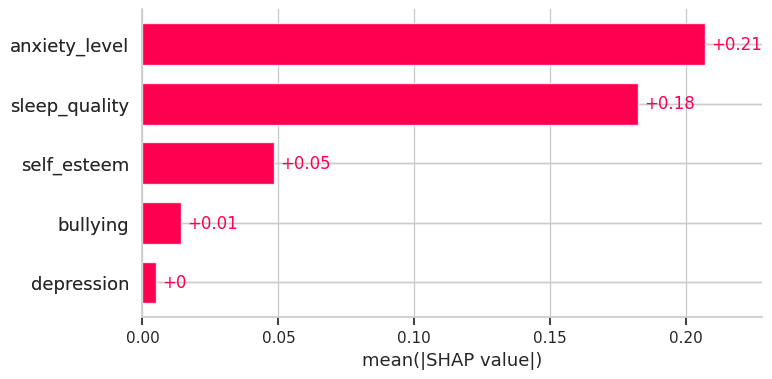

In [16]:
import shap

# Crear explainer y calcular valores SHAP
explainer = shap.Explainer(tree, X_train)
shap_values = explainer(X_test)

# Visualizar importancia general correctamente (para clasificaci√≥n multiclase con SHAP moderno)
shap.plots.bar(shap_values[:, :, 1])  # 1 = clase "media" de stress_level (ajusta seg√∫n necesites)


In [17]:
# Estudiantes con alta ansiedad, baja autoestima, depresi√≥n alta, mal sue√±o y bullying
riesgo = df[
    (df["anxiety_level"] >= 16) &
    (df["self_esteem"] < 15) &
    (df["depression"] >= 15) &
    (df["sleep_quality"] <= 2) &
    (df["bullying"] >= 3)
]

print(f"üõë Estudiantes en riesgo cr√≠tico detectados: {riesgo.shape[0]}")
riesgo[["anxiety_level", "self_esteem", "depression", "sleep_quality", "bullying", "stress_level"]]


üõë Estudiantes en riesgo cr√≠tico detectados: 239


anxiety_level  self_esteem  depression  sleep_quality  bullying  \
3                16           12          15              1         5   
5                20           13          21              1         5   
7                17            3          22              1         5   
10               17           12          25              1         5   
19               21            1          25              1         5   
...             ...          ...         ...            ...       ...   
1085             19            3          24              1         5   
1088             20           10          18              1         4   
1091             19           11          25              1         5   
1098             21            0          19              1         4   
1099             18            6          15              0         4   

      stress_level  
3                2  
5                2  
7                2  
10               2  
19               2  
...            ...  
1085             2  
1088             2  
1091             2  
1098             2  
1099             2  

[239 rows x 6 columns]

## üß† Conclusiones cient√≠ficas

Los resultados muestran que la ansiedad, la depresi√≥n y el bullying tienen el mayor peso predictivo sobre el nivel de estr√©s estudiantil. La interpretaci√≥n con SHAP respalda esta relaci√≥n de forma no lineal.

Desde una perspectiva neuropsicol√≥gica:
- El estr√©s sostenido activa el eje HPA (hipot√°lamo-hip√≥fisis-adrenal), generando hiperactivaci√≥n amigdalina y disfunci√≥n prefrontal.
- Estudiantes con sue√±o deficiente y baja autoestima presentan mayor vulnerabilidad, tal como sugieren los modelos de Sapolsky y Fink (2016).

Desde la sociolog√≠a:
- El apoyo social bajo y el bullying act√∫an como factores de tensi√≥n cr√≥nica en el marco de Pearlin, afectando el afrontamiento y la salud mental.

**Este an√°lisis sienta las bases para intervenciones basadas en datos, dirigidas a mitigar el estr√©s acad√©mico y mejorar el bienestar psicol√≥gico y social de los estudiantes.**

In [18]:
# Exportar an√°lisis de cl√∫steres a CSV
output_path = "../reports/cluster_analysis.csv"
df.to_csv(output_path, index=False)
print(f"‚úÖ Resultados exportados a: {output_path}")


‚úÖ Resultados exportados a: ../reports/cluster_analysis.csv
